In [2]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt

In [3]:
M = 1               #"big" particle mass
m = 0.001           #mediating particle mass
c = 1               #speed of mediating particle
ro = 1              #initial separation
vo = 0              #initial speed (of massive particles)

N = 50              #number of collisions to track
                    #WARNING: only finite number actually occur
                    #so this will break down if N chosen too large

In [4]:
t = np.zeros(N)     #times collision cycles begin
v = np.zeros(N)     #particle speeds at start of collision cycle
r = np.zeros(N)     #spatial separation at start of collision cycle 

r[0] = ro           #set initial values in arrays
v[0] = vo
t[0] = 0

In [5]:
i = 0
while i<N-1:
    v[i+1] = v[i] + 2*m*c/M
    t[i+1] = t[i] + r[i]/(2*(c-v[i]))
    r[i+1] = r[i] + 2*(v[i]+m*c/M)*(r[i]/(c-v[i]))
    
    i=i+1

In [6]:
#Acceleration obtained by finite-difference
a = (v[1:N]-v[0:N-1])/(t[1:N]-t[0:N-1])

#Acceleration applies to "midpoint" so to plot vs r we need the r
#values mid-collision cycle
ra = r[0:N-1] + 0.5*(r[1:N]-r[0:N-1])

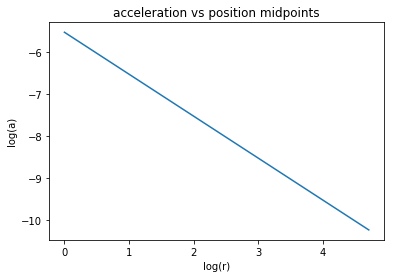

In [9]:
plt.plot(np.log(ra),np.log(a))
plt.xlabel('log(r)')
plt.ylabel('log(a)')
plt.title('acceleration vs position midpoints')
plt.show()


In [8]:
#linear curve fit p[0] is slope, p[1] is y-int
p = np.polyfit(np.log(ra),np.log(a),1)
print(p[0])

-0.9999999999999994
